# Data gathering and visualization
* Here we are web scrapping  reviews from google play store for a given app by using python and we are creating two word clouds - one for words occurring in the most favourable review, and another one for and the lowest reviews.

# Setup
* Let's install the required packages and setup the imports:

In [1]:
#installing google play API
pip install google-play-scraper

     |████████████████████████████████| 51kB 43kB/s eta 0:00:011
  Stored in directory: /home/sakil/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper
Note: you may need to restart the kernel to use updated packages.


In [2]:
#install watermark
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.7.3
IPython version      : 7.6.1

pandas             : 0.25.3
matplotlib         : 3.1.2
seaborn            : 0.9.0
google_play_scraper: 0.1.2



In [ ]:
# importing all the required Libraries
import glob
import json
import csv
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer 
import re
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [100]:
#choosing  some apps
# e.g. enter this URL: it.rortos.airfighters
app_name=input("Enter URL from google playstore")
app_packages = [
  
   app_name
    
    
]

Enter URL from google playstoreit.rortos.airfighters


# Scraping App Information

In [101]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


In [102]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))
#print_json(app_infos)

In [103]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,AirFighters,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,THE MOST ADVANCED FIGHTER PLANE COMBAT AND FLI...,"10,000,000+",10000000,3.805877,134637,47377,...,True,True,"Nov 7, 2015",1601281493,4.2.4,Bug fixes,Bug fixes,False,it.rortos.airfighters,https://play.google.com/store/apps/details?id=...


In [104]:
app_infos_df.shape

(1, 49)

# Scraping App Reviews

In [105]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 1/1 [00:04<00:00,  4.97s/it]


In [106]:
print_json(app_reviews[0])

{
  "appId": "it.rortos.airfighters",
  "at": "2020-12-07 20:29:19",
  "content": "I bought package but the experience of flying an f18 and an a10 are all the same, minus the payload than other aircraft. I wasted my money on this packages. I will play this game SOMETIME only because i paid add-ons. Don't buy any aircraft add-ons",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "4.2.4",
  "reviewId": "gp:AOqpTOEfa4ZAQ5JZPTFasi5aEOgjM4wnL2Yrbfkv3obEygDNWdvwnntFpa6zM-eHz395Y_hsJUOxVYiYjxwjEg",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 8,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14Gi8u61o0CMs3iluKKjrexfDqe3lqicdYAbo4P3t",
  "userName": "jisun. jlim"
}



In [107]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEfa4ZAQ5JZPTFasi5aEOgjM4wnL2Yrbfkv3ob...,jisun. jlim,https://play-lh.googleusercontent.com/a-/AOh14...,I bought package but the experience of flying ...,1,8,4.2.4,2020-12-07 20:29:19,None,NaT,most_relevant,it.rortos.airfighters
1,gp:AOqpTOHl-QGE15GjS9D2t2eXeaDT-SHV4JcgRAEVr9f...,Dennis Fitzgerald,https://play-lh.googleusercontent.com/-cWaSx7_...,Too many pop ups and bs trying to get you to b...,1,14,4.2.4,2020-11-10 18:23:39,None,NaT,most_relevant,it.rortos.airfighters


In [108]:
app_reviews_df_all_reviews_rating_data=pd.DataFrame(app_reviews_df,columns={"content","score"})

In [109]:
app_reviews_df_all_reviews_rating_data.head()

,score,content
0,1,I bought package but the experience of flying ...
1,1,Too many pop ups and bs trying to get you to b...
2,1,"For couple days it's functional, however after..."
3,1,The controls are so out of wack this game is n...
4,1,The brake does absolutely nothing and its extr...


In [110]:
app_reviews_df_all_reviews_rating_data.to_csv('reviews.csv', index=None, header=True)

In [111]:
reviews_data=pd.read_csv("reviews.csv")
reviews_data.head()

,score,content
0,1,I bought package but the experience of flying ...
1,1,Too many pop ups and bs trying to get you to b...
2,1,"For couple days it's functional, however after..."
3,1,The controls are so out of wack this game is n...
4,1,The brake does absolutely nothing and its extr...


# WordCloud on rating 5

In [114]:
reviews_data_rating5 = reviews_data[reviews_data["score"]==5]
reviews_data_rating5.tail()

,score,content
1195,5,This game is good and realstic air combat. But...
1196,5,I love this 😍😍😍😍😍😍😍 game
1197,5,Always able to make me come back
1198,5,Amazing
1199,5,Nice


In [115]:
def stemming(tokens):
    #ps=PorterStemmer()
    ps = WordNetLemmatizer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.lemmatize(x))
    return stem_words

In [116]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in reviews_data_rating5["content"]:
        text = val.lower()
        all_stopwords_gensim =STOPWORDS.union(set(['game','nt']))
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in all_stopwords_gensim]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [117]:
def plot_Cloud(wordCloud):
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [75]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/sakil/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [118]:
reviews_data_rating5_wordcloud = WordCloud(background_color='black',width=900, height=500).generate(create_Word_Corpus(reviews_data_rating5))

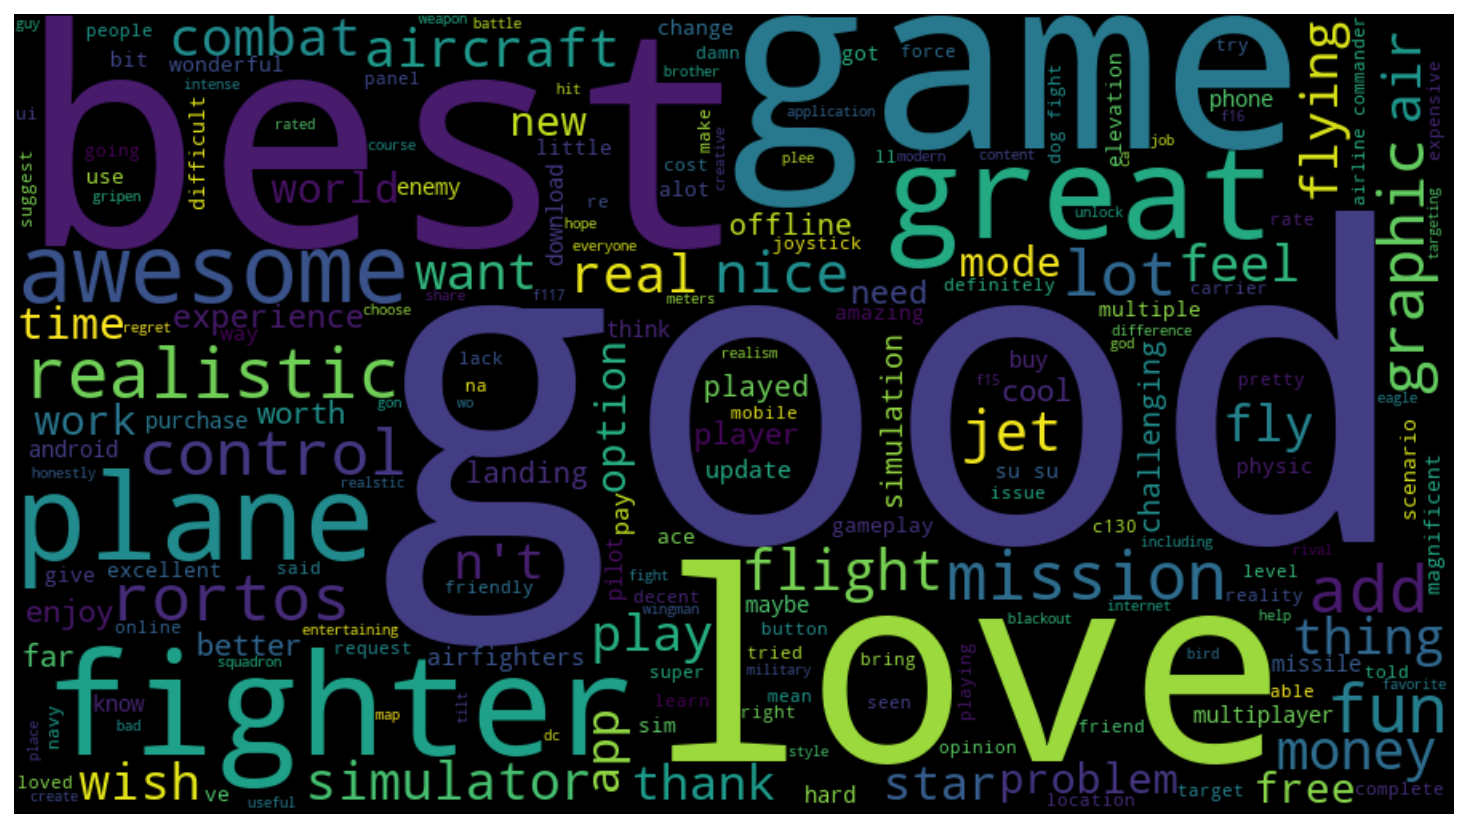

In [119]:
plot_Cloud(reviews_data_rating5_wordcloud)

# WordCloud on rating 1

In [120]:
reviews_data_rating1 = reviews_data[reviews_data["score"]==1]
reviews_data_rating1.tail()

,score,content
195,1,"I would give it zero if possible, i purchased ..."
196,1,Nothing to do after missions
197,1,Nice control
198,1,🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕🖕👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎 worst game ever
199,1,All paid options..


In [121]:
def create_Word_Corpus_for_rating1(df):
    words_corpus = ''
    for val in reviews_data_rating1["content"]:
        text = val.lower()
        all_stopwords_gensim =STOPWORDS.union(set(['game','t','n','`','V','e']))
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in all_stopwords_gensim]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [122]:
reviews_data_rating1_wordcloud = WordCloud(background_color='black',width=900, height=500).generate(create_Word_Corpus_for_rating1(reviews_data_rating1))

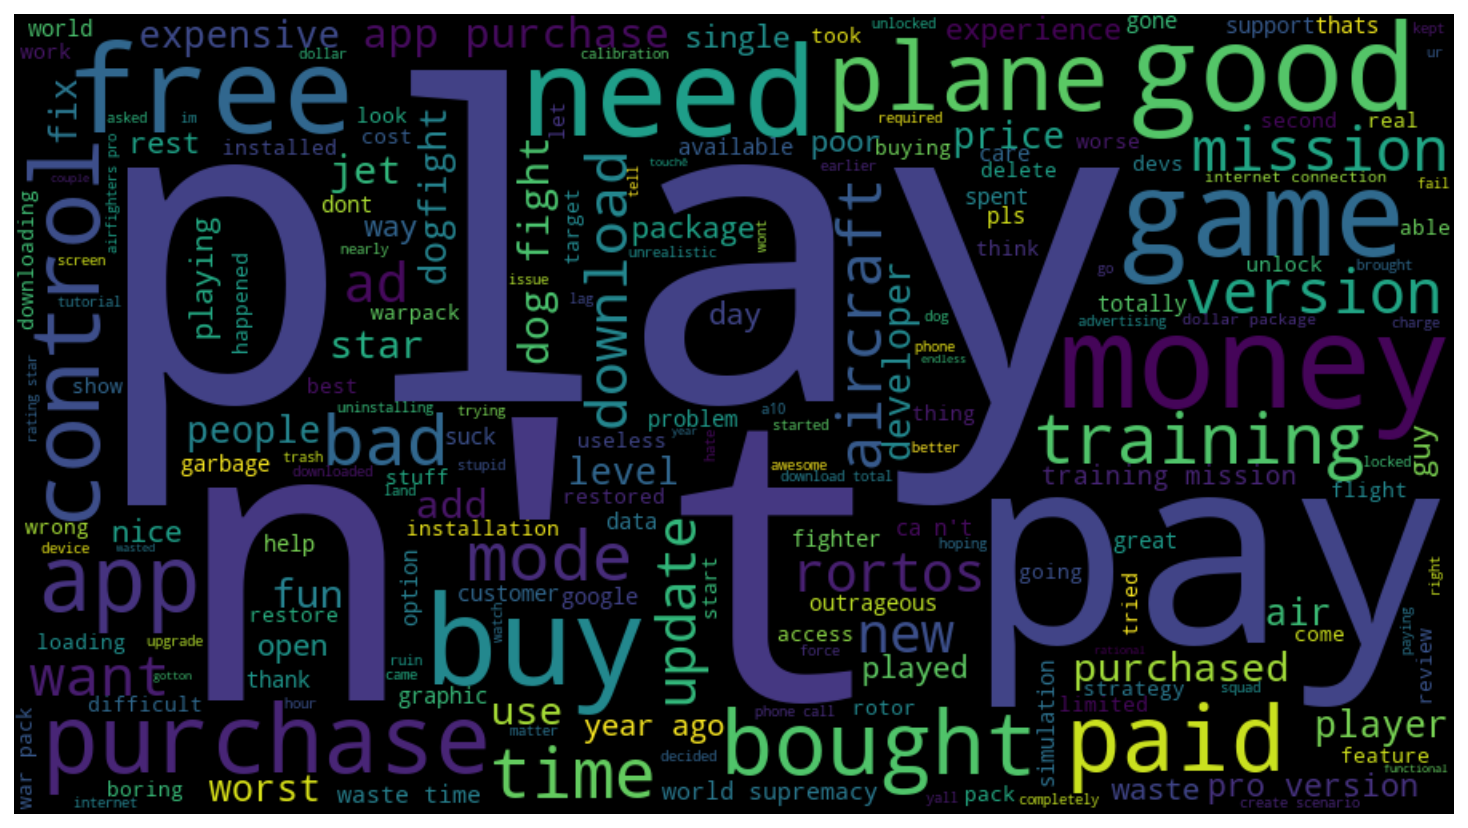

In [123]:
plot_Cloud(reviews_data_rating1_wordcloud)